In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plts

%matplotlib inline

In [108]:
df10 = pd.read_csv('DATA/ENS_CLEAN_10.csv')
df20 = pd.read_csv('DATA/ENS_CLEAN_20.csv')


necesitamos edad de 0 a 5, entonces sumamos 0 a 2 y 3 a 5

In [109]:
#10: sumamos los valores de los campos de edad 
df10['P_0A5'] = df10['P_0A2'] + df10['P_3A5']
#borramos los sumados 
df10 = df10.drop(['P_0A2', 'P_3A5'], axis=1)

#20: sumamos los valores de los campos de edad
df20['P_0A5'] = df20['P_0A2'] + df20['P_3A5']
#borramos los sumados
df20 = df20.drop(['P_0A2', 'P_3A5'], axis=1)

In [110]:
df10.head()

,index,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,4,Ensenada,1,Ensenada,0435,1,48.0,4.0,8.31,2.50,15.0,1.02,3.43,7.0,16.0,6.0
1,5,Ensenada,1,Ensenada,0435,3,41.0,6.0,9.48,2.40,16.0,0.85,3.15,4.0,16.0,3.0
2,6,Ensenada,1,Ensenada,0435,4,41.0,4.0,10.29,1.88,11.0,0.87,4.10,7.0,16.0,3.0
3,7,Ensenada,1,Ensenada,0435,6,54.0,4.0,10.24,1.82,23.0,0.72,3.18,10.0,17.0,3.0
4,8,Ensenada,1,Ensenada,0435,7,54.0,7.0,9.85,2.33,17.0,0.78,3.38,7.0,18.0,6.0


In [111]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5255 entries, 0 to 5254
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       5255 non-null   int64  
 1   NOM_MUN     5255 non-null   object 
 2   LOC         5255 non-null   int64  
 3   NOM_LOC     5255 non-null   object 
 4   AGEB        5255 non-null   object 
 5   MZA         5255 non-null   int64  
 6   P_TOTAL     5255 non-null   float64
 7   POB65_MAS   5255 non-null   float64
 8   GRAPROES    5255 non-null   float64
 9   PROM_HNV    5255 non-null   float64
 10  VIVTOT      5255 non-null   float64
 11  PRO_OCUP_C  5255 non-null   float64
 12  PROM_OCUP   5255 non-null   float64
 13  VPH_PC      5255 non-null   float64
 14  OTRAENT     5255 non-null   float64
 15  P_0A5       5255 non-null   float64
dtypes: float64(10), int64(3), object(3)
memory usage: 657.0+ KB


recordemos que nuestro analisis es por agebs, entonces agrupamos por ageb

In [112]:

#make a dictionary of the columns being the keys, if Dtype is an object, value is 'first', else is 'sum' 

#agg_dict = {col: 'sum' if df10[col].dtype == np.dtype('float64') else 'first' for col in df10.columns.tolist()}

agg_dict = {}

#le ponemos suma a todos los que no sean object
for col in df10.columns.tolist():
    if df10[col].dtype == np.dtype('float64'):
        agg_dict[col] = 'sum'
    else:
        agg_dict[col] = 'first'

#les ponemos media a los que correspondan
media = ['GRAPROES', 'PROM_HNV', 'PRO_OCUP_C', 'PROM_OCUP']

for col in media:
    agg_dict[col] = 'mean'

agg_dict



{'index': 'first',
 'NOM_MUN': 'first',
 'LOC': 'first',
 'NOM_LOC': 'first',
 'AGEB': 'first',
 'MZA': 'first',
 'P_TOTAL': 'sum',
 'POB65_MAS': 'sum',
 'GRAPROES': 'mean',
 'PROM_HNV': 'mean',
 'VIVTOT': 'sum',
 'PRO_OCUP_C': 'mean',
 'PROM_OCUP': 'mean',
 'VPH_PC': 'sum',
 'OTRAENT': 'sum',
 'P_0A5': 'sum'}

aplicamos las funciones

In [113]:
df10_agebs = df10.groupby('AGEB', as_index=False).agg(agg_dict)
df20_agebs = df20.groupby('AGEB', as_index=False).agg(agg_dict)

borramos columnas redundantes, todo es LOCALIDAD ENSENADA

In [114]:
df10_agebs = df10_agebs.drop(columns=['NOM_MUN','LOC'])
df20_agebs = df20_agebs.drop(columns=['NOM_MUN','LOC'])

In [115]:
df10_agebs['AGEB'].count()

190

In [116]:
df20_agebs['AGEB'].count()

220

tenemos 190 y 220 AGEBS entre 2010 y 2020 respectivamente

In [117]:
#identifying in 2020 the agebs that are not in 2010
agebs_20 = df20_agebs['AGEB'].tolist()
agebs_10 = df10_agebs['AGEB'].tolist()

agebs_20_not_in_10 = [ageb for ageb in agebs_20 if ageb not in agebs_10]
print('en 20 no en 10: ', agebs_20_not_in_10)

#identifying in 2010 the agebs that are not in 2020
agebs_10_not_in_20 = [ageb for ageb in agebs_10 if ageb not in agebs_20]
print('en 10 no en 20',agebs_10_not_in_20)

#cuantos? 
print('cuantos en 20 no en 10: ', len(agebs_20_not_in_10))

en 20 no en 10:  ['0026', '0030', '0083', '0098', '0100', '0115', '012A', '0134', '0149', '0153', '0168', '0172', '0187', '0191', '0204', '2060', '2075', '208A', '2107', '2111', '2126', '2145', '215A', '2164', '2179', '2183', '2198', '2234', '2431', '2446']
en 10 no en 20 []
cuantos en 20 no en 10:  30


como se ven nuestros dataframes? 

In [118]:
df10_agebs.head(3)

,index,NOM_LOC,AGEB,MZA,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,4,Ensenada,0435,1,3632.0,325.0,9.617302,2.193333,1321.0,0.853016,3.352540,584.0,1241.0,419.0
1,68,Ensenada,044A,1,1539.0,224.0,9.569643,2.264286,549.0,0.750714,3.152143,254.0,478.0,135.0
2,97,Ensenada,0454,1,2211.0,188.0,10.994717,1.929057,742.0,0.661887,3.145849,438.0,760.0,118.0


In [119]:
df20_agebs.head(3)

,index,NOM_LOC,AGEB,MZA,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,4,Ensenada,0026,1,64.0,16.0,8.920000,2.610000,26.0,1.010000,3.016667,27.0,57.0,0.0
1,8,Ensenada,0030,1,154.0,8.0,14.757778,1.202222,165.0,0.596667,2.431111,86.0,127.0,0.0
2,27,Ensenada,0083,1,1498.0,24.0,9.802222,1.415926,565.0,0.834815,2.568889,186.0,516.0,193.0


In [120]:
df10_agebs.columns

Index(['index', 'NOM_LOC', 'AGEB', 'MZA', 'P_TOTAL', 'POB65_MAS', 'GRAPROES',
       'PROM_HNV', 'VIVTOT', 'PRO_OCUP_C', 'PROM_OCUP', 'VPH_PC', 'OTRAENT',
       'P_0A5'],
      dtype='object')

DESCARGAMOS

In [121]:
# keep only the rows with digits in the AGEB column

#how many agebs had letters in 2010? 
print(df10_agebs['AGEB'].str.isdigit().value_counts() )

#how many agebs had letters in 2020?
print(df20_agebs['AGEB'].str.isdigit().value_counts() )

#do it with df10_agebs and df20_agebs
df10_agebs = df10_agebs[df10_agebs['AGEB'].str.isdigit()]
df20_agebs = df20_agebs[df20_agebs['AGEB'].str.isdigit()]


True     172
False     18
Name: AGEB, dtype: int64
True     199
False     21
Name: AGEB, dtype: int64


In [122]:

# save the cleaned data as a CSV file
df10_agebs.to_csv('DATA/ENS_AGEBS_10.csv', index=False)
df20_agebs.to_csv('DATA/ENS_AGEBS_20.csv', index=False)


voy a determinar los rangos de cada variable para ponerla en mi tabla de la propuesta en latex

In [123]:
#rango de cada columna
for col in df10_agebs.columns:
    print(col, df10_agebs[col].min(), df10_agebs[col].max())

index 4 5447
NOM_LOC Ensenada Ensenada
AGEB 0435 9903
MZA 1 20
P_TOTAL 0.0 5628.0
POB65_MAS 0.0 375.0
GRAPROES 0.0 15.273333333333333
PROM_HNV 0.0 2.91
VIVTOT 0.0 1849.0
PRO_OCUP_C 0.0 3.595
PROM_OCUP 0.0 4.605
VPH_PC 0.0 992.0
OTRAENT 0.0 1987.0
P_0A5 0.0 557.0


<AxesSubplot: xlabel='GRAPROES', ylabel='P_TOTAL'>

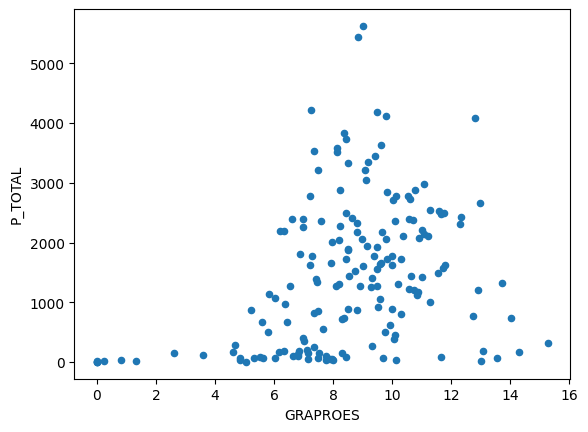

In [124]:
#scatter plot P_TOTAL vs GRAPROES 
df10_agebs.plot.scatter(y='P_TOTAL', x='GRAPROES')

<AxesSubplot: >

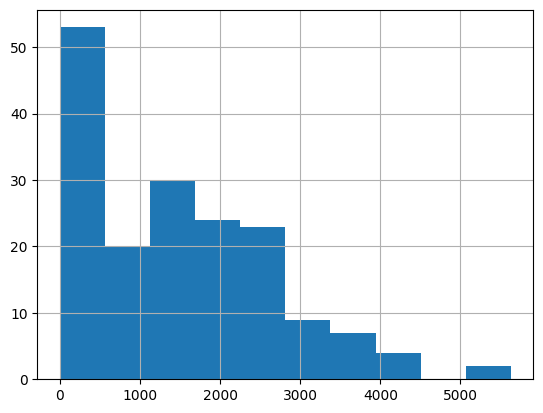

In [125]:
#histograma de P_TOTAL
df10_agebs['P_TOTAL'].hist()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15792\1375557824.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean10 = df10_agebs.groupby('AGEB').mean().reset_index()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15792\1375557824.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean20 = df20_agebs.groupby('AGEB').mean().reset_index()
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\matplotlib\transforms.py:2047: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[1, 2] += ty
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\matplotlib\transforms.py:20

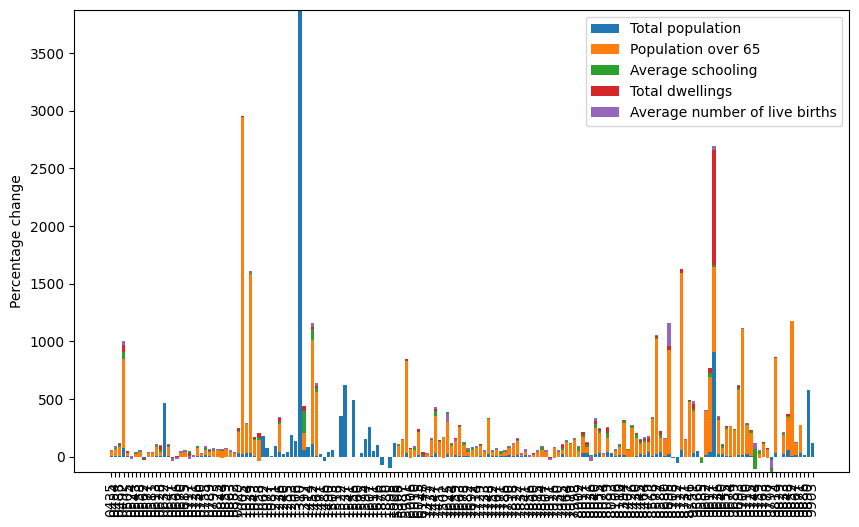

In [126]:
# Calculate the mean values for each AGEB in 2010 and 2020
mean10 = df10_agebs.groupby('AGEB').mean().reset_index()
mean20 = df20_agebs.groupby('AGEB').mean().reset_index()

# Merge the mean values for 2010 and 2020
merged = pd.merge(mean10, mean20, on='AGEB', suffixes=('_2010', '_2020'))

# Calculate the percentage change in each variable from 2010 to 2020
for col in ['P_TOTAL', 'POB65_MAS', 'GRAPROES', 'PROM_HNV', 'VIVTOT', 'PRO_OCUP_C', 'PROM_OCUP', 'VPH_PC', 'OTRAENT', 'P_0A5']:
    merged[col + '_change'] = (merged[col + '_2020'] - merged[col + '_2010']) / merged[col + '_2010'] * 100

# Plot the percentage change in each variable from 2010 to 2020
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(merged['AGEB'], merged['P_TOTAL_change'], label='Total population')
ax.bar(merged['AGEB'], merged['POB65_MAS_change'], bottom=merged['P_TOTAL_change'], label='Population over 65')
ax.bar(merged['AGEB'], merged['GRAPROES_change'], bottom=merged['P_TOTAL_change'] + merged['POB65_MAS_change'], label='Average schooling')
ax.bar(merged['AGEB'], merged['VIVTOT_change'], bottom=merged['P_TOTAL_change'] + merged['POB65_MAS_change'] + merged['GRAPROES_change'], label='Total dwellings')
ax.bar(merged['AGEB'], merged['PROM_HNV_change'], bottom=merged['P_TOTAL_change'] + merged['POB65_MAS_change'] + merged['GRAPROES_change'] + merged['VIVTOT_change'], label='Average number of live births')
ax.set_xticklabels(merged['AGEB'], rotation=90)
ax.set_ylabel('Percentage change')
ax.legend()
plt.show()
